## Professor evaluation vs physical appearance

### About the Dataset
The data are gathered from student evaluations for 463 courses taught by a sample of 94 professors from the University of Texas at Austin. Also, six students rate the professors' physical appearance. The result is a data frame where each row contains a different course and each column has information on the course and the professor who taught that course.

### Exploratory Data Analysis

In [31]:
# import libraries likely needed for EDA

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summaries & tests
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine learning utilities 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Display settings for Pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", "{:.2f}".format)

# Plot settings for Seaborn/Matplotlib
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

print("EDA libraries loaded successfully.")


EDA libraries loaded successfully.


In [33]:
# read CSV into a dataframe
df = pd.read_csv("evals.csv")

# check shape
print(df.shape) 


(463, 23)


In [35]:
# check for null values 
null_counts = df.isnull().sum()
print(null_counts)

course_id        0
prof_id          0
score            0
rank             0
ethnicity        0
gender           0
language         0
age              0
cls_perc_eval    0
cls_did_eval     0
cls_students     0
cls_level        0
cls_profs        0
cls_credits      0
bty_f1lower      0
bty_f1upper      0
bty_f2upper      0
bty_m1lower      0
bty_m1upper      0
bty_m2upper      0
bty_avg          0
pic_outfit       0
pic_color        0
dtype: int64


In [37]:
# data types for each column
print("Basic data types for each column:")
dtypes_series = df.dtypes
print(dtypes_series)

Basic data types for each column:
course_id          int64
prof_id            int64
score            float64
rank              object
ethnicity         object
gender            object
language          object
age                int64
cls_perc_eval    float64
cls_did_eval       int64
cls_students       int64
cls_level         object
cls_profs         object
cls_credits       object
bty_f1lower        int64
bty_f1upper        int64
bty_f2upper        int64
bty_m1lower        int64
bty_m1upper        int64
bty_m2upper        int64
bty_avg          float64
pic_outfit        object
pic_color         object
dtype: object


### Detailed descriptions of features and values:

- **course_id**: Integer identifying the course  
- **prof_id**: Integer identifying the professor who taught the course  
- **score**: Average professor evaluation score (1 = very unsatisfactory, 5 = excellent)  
- **rank**: Rank of professor — teaching, tenure track, tenured  
- **ethnicity**: Ethnicity of professor — not minority, minority  
- **gender**: Gender of professor  
- **language**: Language of school where professor received education — English or non-English  
- **age**: Age of professor  
- **cls_perc_eval**: Percent of students in class who completed evaluation  
- **cls_did_eval**: Number of students in class who completed evaluation  
- **cls_students**: Total number of students in class  
- **cls_level**: Class level — lower, upper  
- **cls_profs**: Number of professors teaching sections in course in sample — single, multiple  
- **cls_credits**: Number of credits of class — one credit (lab, PE, etc.), multi credit  
- **bty_f1lower**: Beauty rating of professor from lower level female (1–10)  
- **bty_f1upper**: Beauty rating of professor from upper level female (1–10)  
- **bty_f2upper**: Beauty rating of professor from second upper level female (1–10)  
- **bty_m1lower**: Beauty rating of professor from lower level male (1–10)  
- **bty_m1upper**: Beauty rating of professor from upper level male (1–10)  
- **bty_m2upper**: Beauty rating of professor from second upper level male (1–10)  
- **bty_avg**: Average beauty rating of professor  
- **pic_outfit**: Outfit of professor in picture — not formal, formal  
- **pic_color**: Color of professor's picture — color, black & white  


In [40]:
# Count unique values per column
unique_counts = df.nunique()

print(unique_counts)

course_id        463
prof_id           94
score             27
rank               3
ethnicity          2
gender             2
language           2
age               35
cls_perc_eval    260
cls_did_eval     104
cls_students     127
cls_level          2
cls_profs          2
cls_credits        2
bty_f1lower        8
bty_f1upper        9
bty_f2upper       10
bty_m1lower        7
bty_m1upper        9
bty_m2upper        9
bty_avg           35
pic_outfit         2
pic_color          2
dtype: int64


____________________________________________________________________________________________________________________________________

### Investigating relationships among categorical columns 

#### Create count bar graphs of the categorical columns:

Found 9 columns with 'object' data type:
['rank', 'ethnicity', 'gender', 'language', 'cls_level', 'cls_profs', 'cls_credits', 'pic_outfit', 'pic_color']


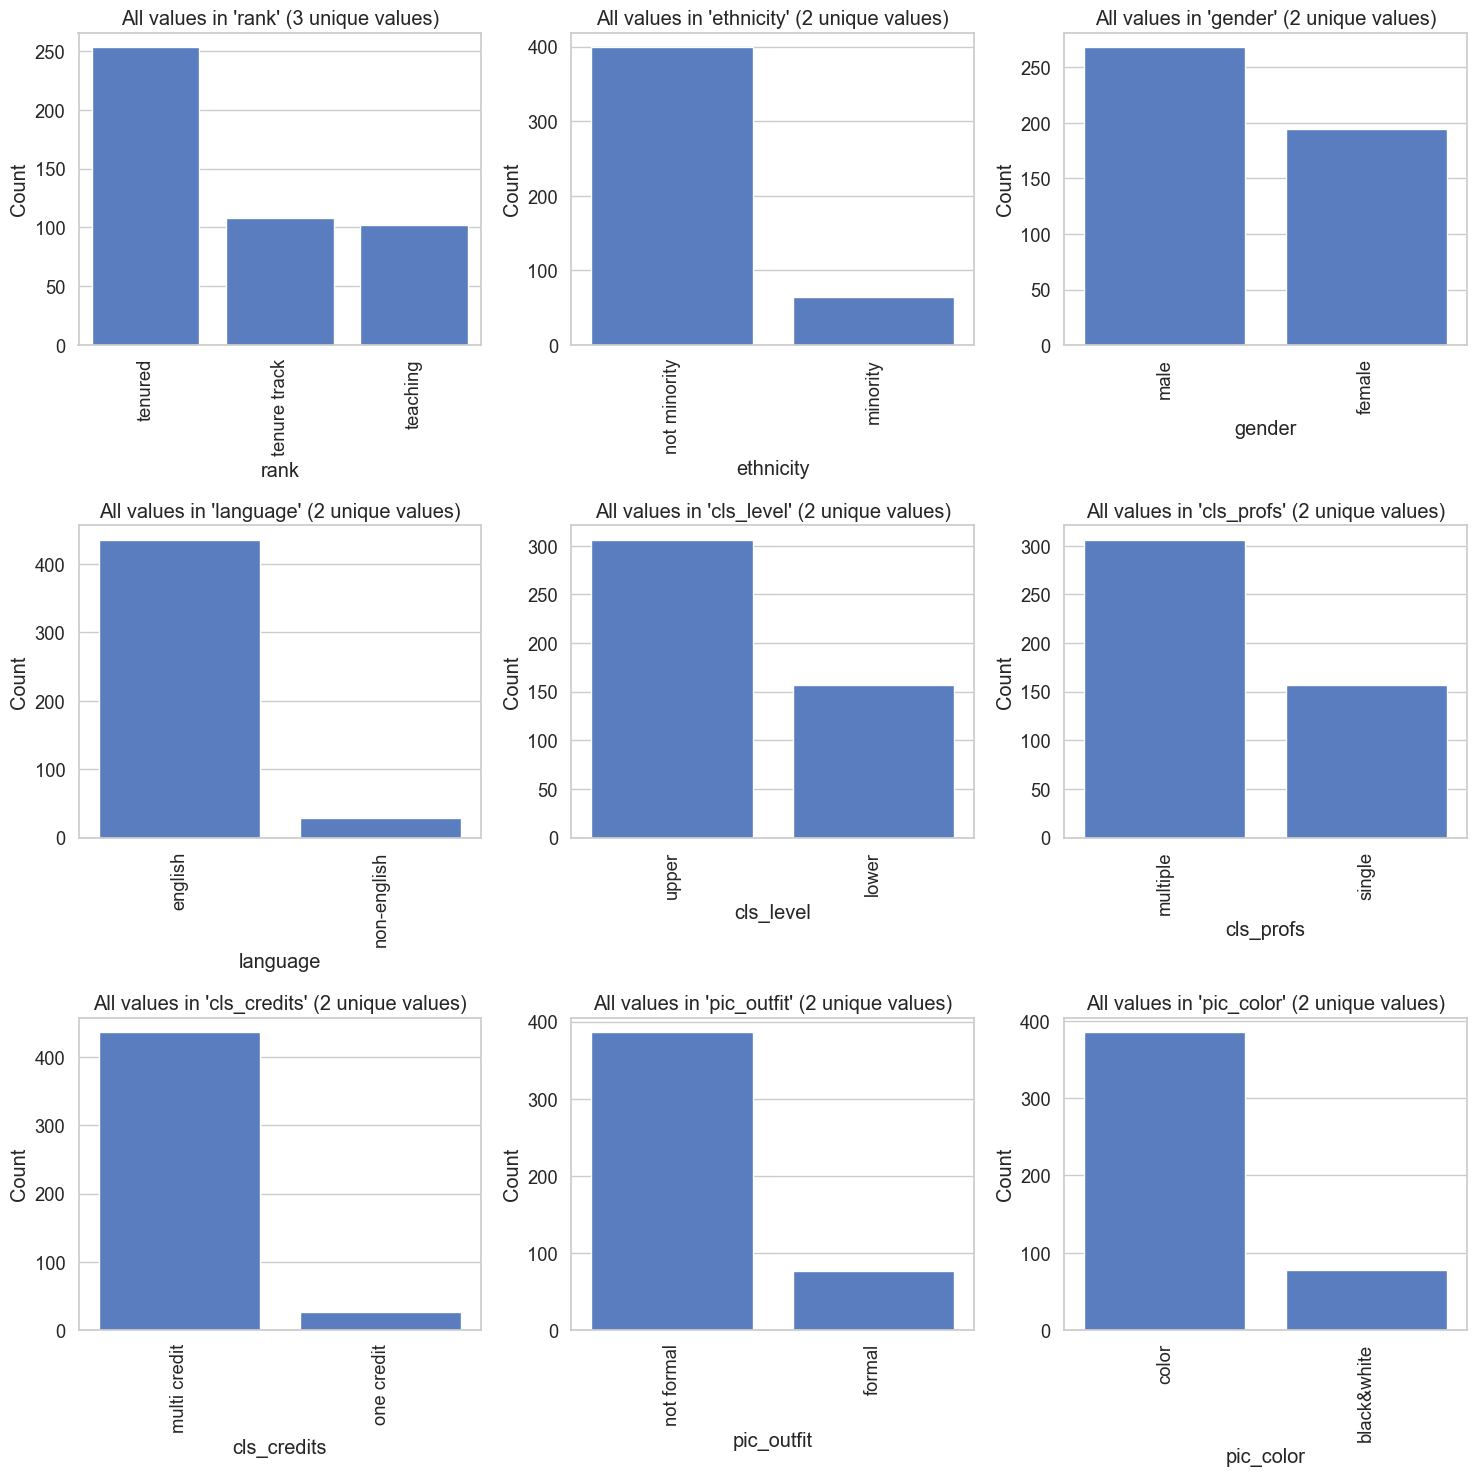

In [45]:
# Identify columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print(f"Found {len(object_columns)} columns with 'object' data type:")
print(object_columns)

# Create a figure with multiple subplots
if len(object_columns) > 0:
    # Calculate grid dimensions
    n_cols = min(3, len(object_columns))
    n_rows = (len(object_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, n_rows * 5))
    
    for i, column in enumerate(object_columns, 1):
        # Count the frequency of each unique value
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Limit to top 15 categories if there are too many
        if len(value_counts) > 15:
            value_counts = value_counts.head(15)
            title = f"Top 15 values in '{column}' (out of {df[column].nunique()} unique values)"
        else:
            title = f"All values in '{column}' ({len(value_counts)} unique values)"
        
        # Create subplot
        plt.subplot(n_rows, n_cols, i)
        
        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        
    plt.tight_layout()
    plt.show()

### It seems that it would be more useful to see percentage bar graphs: 

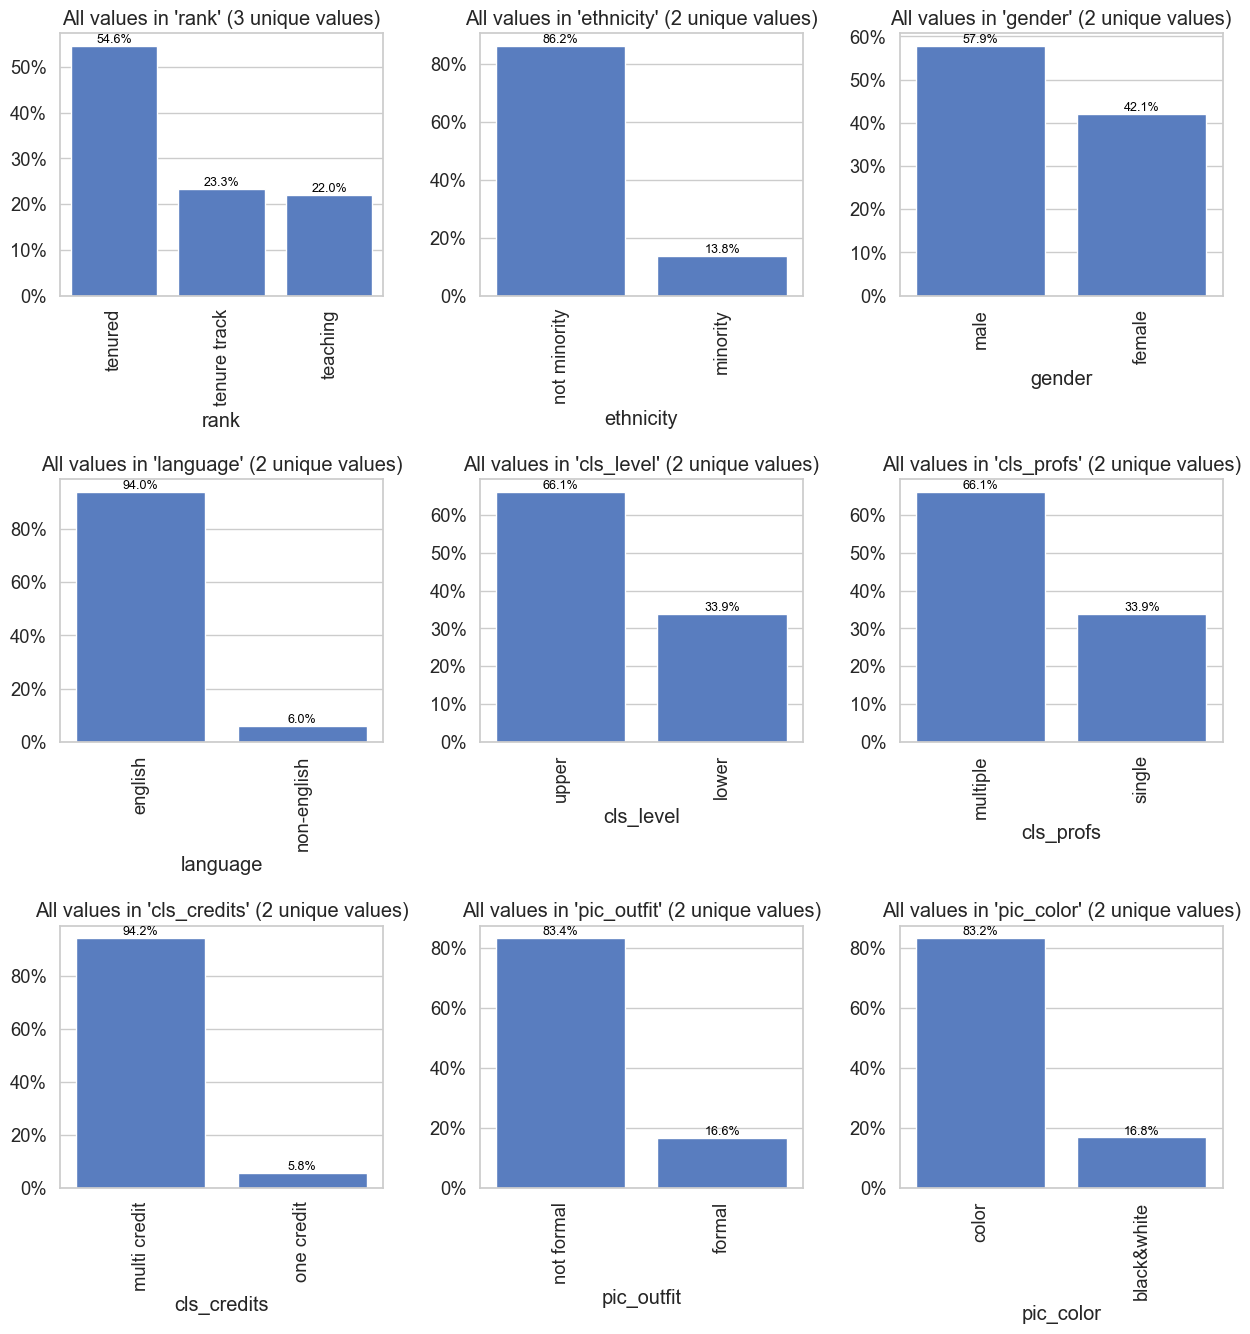

In [48]:
import matplotlib.ticker as mtick

plt.figure(figsize=(15, n_rows * 5))

for i, column in enumerate(object_columns, 1):
    # Get percentages instead of counts
    value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False) * 100
    
    title = f"All values in '{column}' ({len(value_counts)} unique values)"
    
    # Create subplot
    plt.subplot(n_rows, n_cols, i)
    
    # Create bar plot
    ax = sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(title)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    
    # Format y-axis as percentages
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Add labels above bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.3)

plt.show()


### Observations from the above graphs:

- There are more tenured professors than the other categories combined.
- Only about 14% of the professors are minority.
- Males exceed females by about 15%.
- Only 6% of the professors attended non-English speaking institutions.
- About 2/3 of the classes were upper-level.
- About 2/3 of the courses had multiple professors teaching them.
- Almost all courses were multi-credit.
- Only about 17% of the professors were formally dressed in their photos.
- Only about 17% of the photos were in balck-and-white.

### Based on this, it seems that 'language' and 'cls_credits' might well be dropped from the rest of the analysis.

In [51]:
# Drop 'language' and 'cls.credits' from the dataframe.
df = df.drop(columns=["language", "cls_credits"])

_________________________________________________________________________________________________________________________

### Let's examine histograms of the numerical columns:

Found 14 numeric columns:
['course_id', 'prof_id', 'score', 'age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']


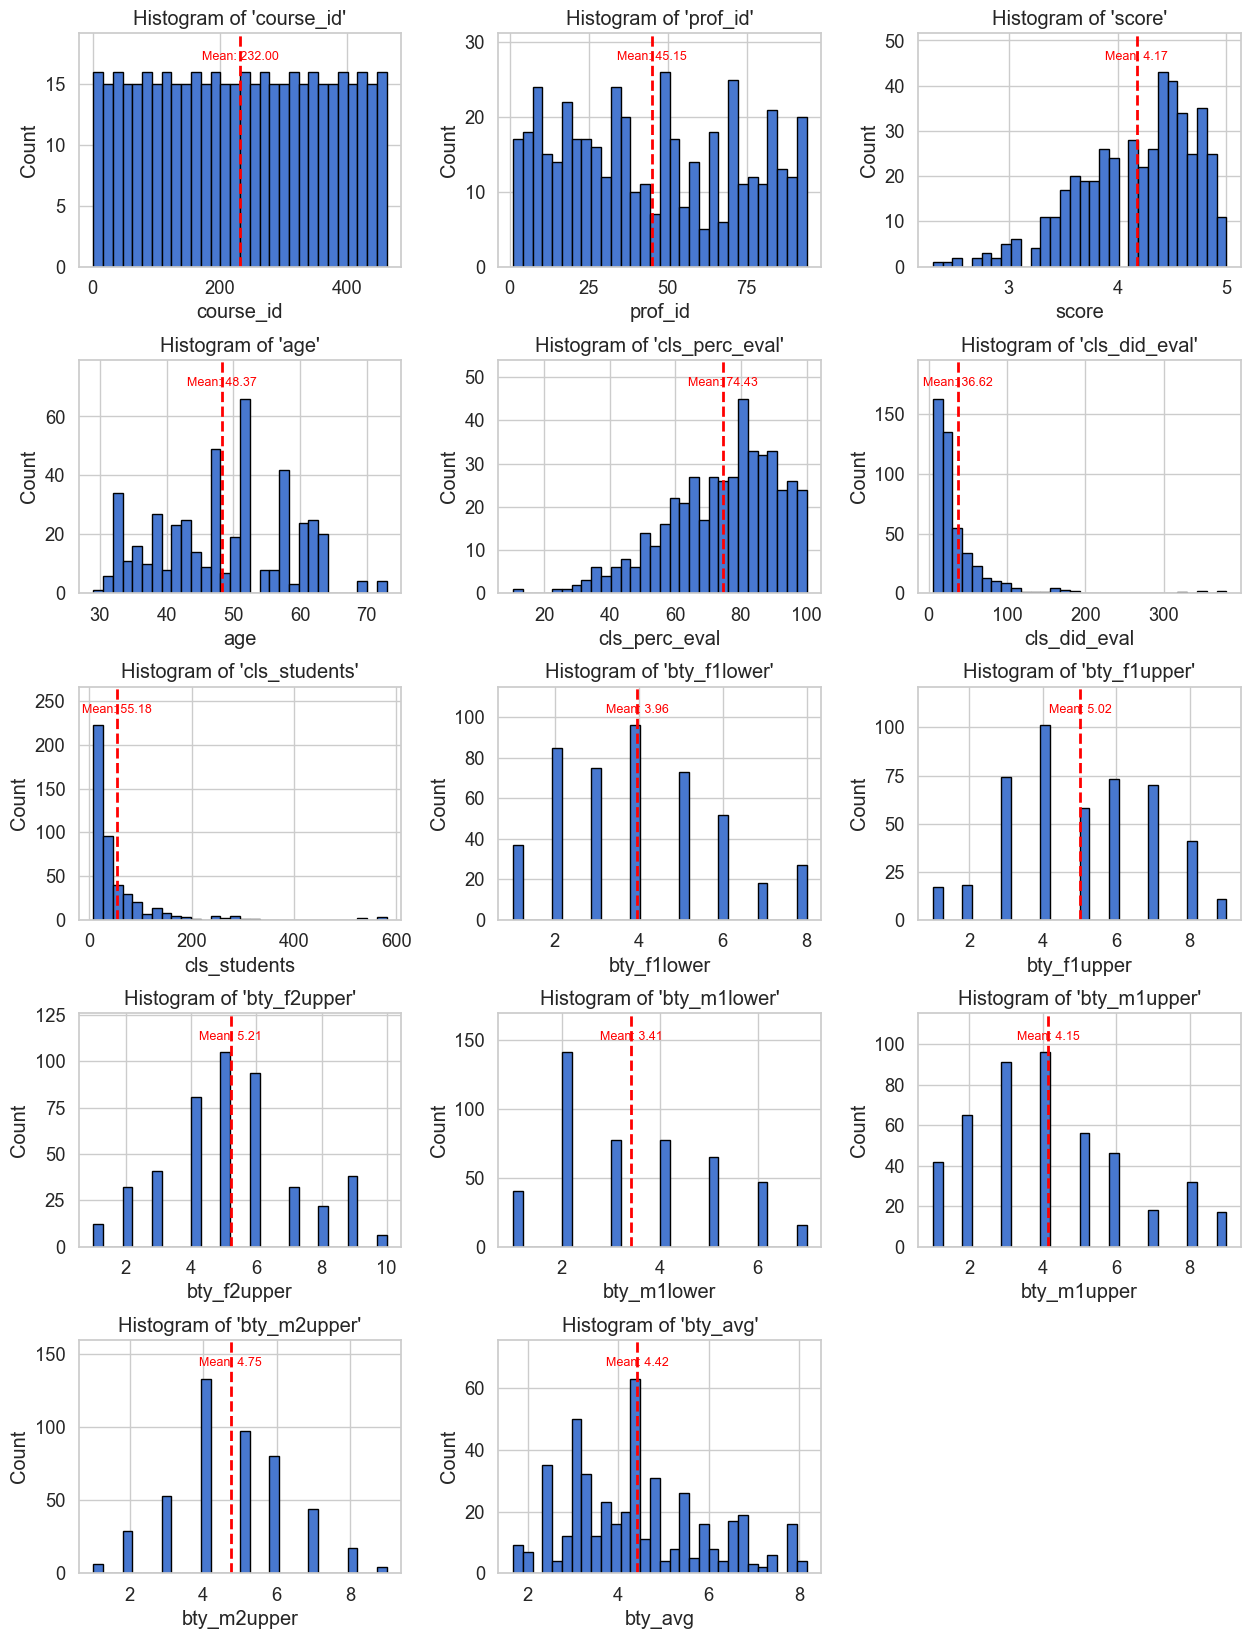

In [72]:
# Select numeric columns (int64 + float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Found {len(numeric_columns)} numeric columns:")
print(numeric_columns)

# Calculate grid size
n_cols = min(3, len(numeric_columns))
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    data = df[column].dropna()
    
    # Histogram counts
    counts, bins = np.histogram(data, bins=30)
    
    # Plot histogram using counts
    bin_width = bins[1] - bins[0]
    plt.bar(bins[:-1], counts, width=bin_width, edgecolor='black', align='edge')
    
    # Mean line
    mean_val = data.mean()
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    
    # Label mean slightly above tallest bar
    y_max = max(counts)
    plt.text(mean_val, y_max * 1.05, f'Mean: {mean_val:.2f}',
             color='red', ha='center', va='bottom', fontsize=9)
    
    plt.title(f"Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.ylim(0, y_max * 1.2)  # leave space above tallest bar

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


### Observations on the above histograms:
- Course ID is uniformly distributed, and so not very informative. It can be dropped.
- Prof_ID is essentially categorical/nominal, since it merely identifies the instructor.
- Score shows a mean attractiveness of 4.17, with a strong left-skew. This is an important number.
- Age shows a mean of about 48, and is quite irregularly distributed.
- About 74% of students completed professor evaluations, very left-skewed shape.
- About 37 was the mean number of students in a class that did the evaluations, very right skewed (could be due to class sizes).
- 55 was the mean class size, again very right-skewed, as in the previous case.
- The mean beauty ratings given by each of the six judges were:
  - Lower-level female: 3.96
  - Upper-level female 1: 5.02
  - Upper-level female 2: 5.21
  - Lower-level male: 3.41
  - Upper-level male 1: 4.15
  - Upper-level male 2: 4.75
 - Overall average beauty rating: 4.42

### Let's look at a heatmap of the categorical columns:

Found 7 object columns:
['rank', 'ethnicity', 'gender', 'cls_level', 'cls_profs', 'pic_outfit', 'pic_color']


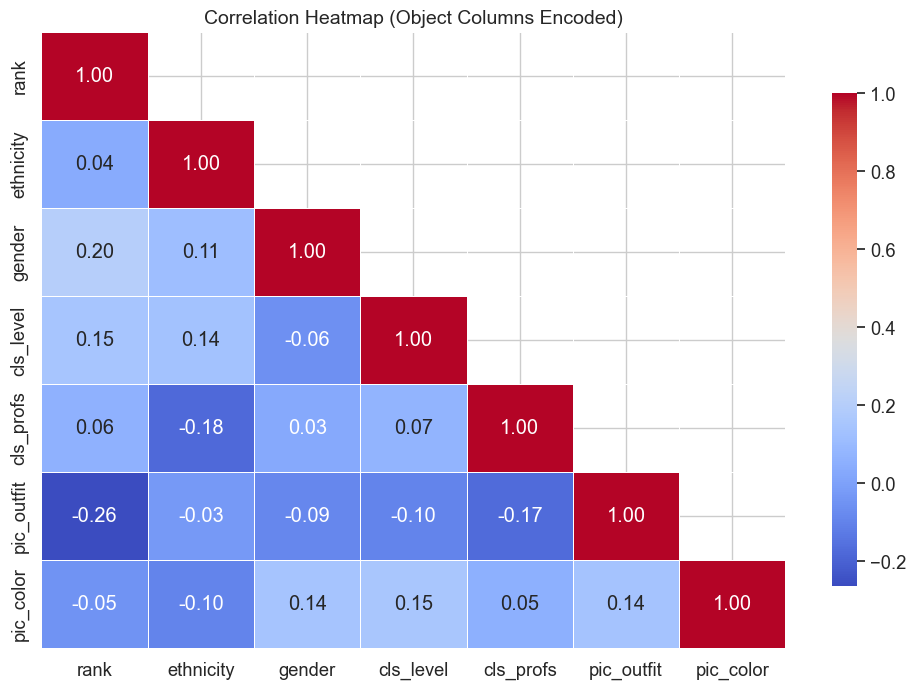

In [81]:
from sklearn.preprocessing import LabelEncoder

# Select object (categorical) columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(object_columns)} object columns:")
print(object_columns)

# Encode categorical columns
encoded_df = df[object_columns].copy()
le = LabelEncoder()
for col in object_columns:
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlation matrix
corr = encoded_df.corr()

# Create a mask for the upper triangle
# Using np.triu instead of np.tril to mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # k=1 excludes the diagonal

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title("Correlation Heatmap (Object Columns Encoded)", fontsize=14)
plt.show()

### There do not appear to be any significant correlations among the categorical features.

____________________________________________________________________________________________________________

### Let's look at a heatmap of the numerical columns:

Found 14 numeric columns:
['course_id', 'prof_id', 'score', 'age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']


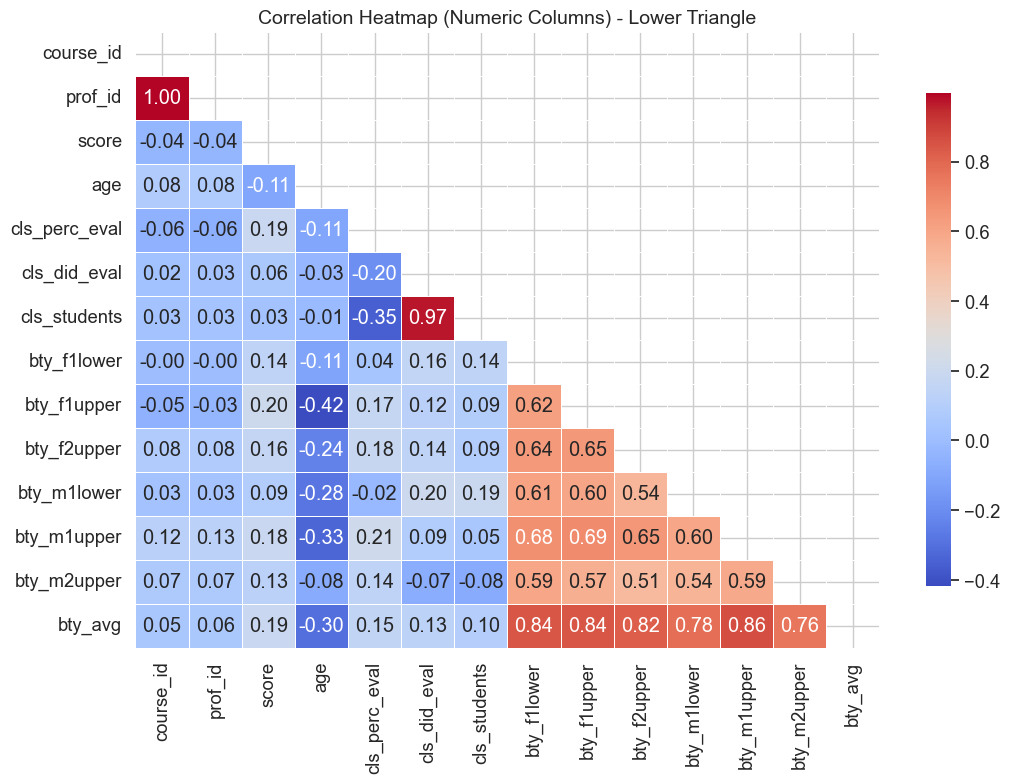

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (int64 + float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Found {len(numeric_columns)} numeric columns:")
print(numeric_columns)

# Compute correlation matrix for numeric columns
corr = df[numeric_columns].corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap (lower triangle only)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title("Correlation Heatmap (Numeric Columns) - Lower Triangle", fontsize=14)
plt.show()


### Observations on the above heatmap:
- The values at or near 1 can be disregarded: They merely reflect that courses match professors and that class size is nearly perfectly correlated with the number of evaluations done.
- It is interesting that the 1t upper-level female judge's ratings correlate fairly strongly (negatively) with professor's age (-0.42).
- As for the orange tiles, they merely reflect the general agreement among the judges. Note that the 2nd upper-level male judge has the weakest correlation with the other judges, though not by much.